<a href="https://colab.research.google.com/github/JakubNajman/CORA_Analysis/blob/main/ONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt na zaliczenie przedmiotu ONS - Analiza zbioru CORA. Jakub Najman
Poniższy zeszyt programu Jupyter zawiera analizę zbioru danych CORA. Zbiór CORA to zbiór danych dotyczący 2708 prac naukowych z zakresu sztucznej inteligencji podzielonych na 7 kategorii. Poniższy zeszyt zawiera analizę sieci powiązań, analizę wezłów sieci, analizę podstawowych wartości grafu, który jest stworzony przez sieć oraz na samym końcu bardzo prostą sieć neuronową GCN - Graph Convolutional Network korzystającą z biblioteki Stellar Graph.

## 1. Analiza zbioru danych oraz wskazanie podstawowych wartości.
Poniższe komórki zawierają analizę zbioru danych w tym prezentację danych jako grafu powiązań, wskazanie podstawowych wartości tego grafu takich jak: liczb węzłów, skierowanie grafu, średni stopień węzła oraz 10 węzłów z największym stopniem (outlierów).

In [1]:
!pip install torch-geometric

In [2]:
#Importowanie niezbędnych bibliotek takich jak torch i torch_geometrics, które posiadają w swoich klasach zbiór danych CORA.
import os

import torch
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

data = '/content/drive/MyDrive/ONS'

In [3]:
#Utworzenie obiektu klasy Planetoid wraz z miejscem zapisu danych na podłączonym dysku Google Drive. Klasa Planetoid to klasa biblioteki torch_geomentrics enkapsulująca zbiór danych CORA i inne zbiory danych.
dataset = Planetoid(root=data, name='Cora')
data = dataset[0]

##1.1 Podstawowe wartości grafu
Poniżej zostały przedstawione wartości grafu:
- liczba węzłów informuje nas liczności wężłów w grafie,
- liczba krawędzi informuje nas o unikalnych połączeniach między węzłami,
- skierowanie grafu opisuje nam relacyjność między połączeniami, w naszym przypadku graf nie jest skierowany więc nie istnieje relacyjność między połączeniami węzłów,
- średni stopień węzła w grafie informuje nas o tym ile średnio połączeń ma każdy węzeł - dla zbioru danych CORA to prawie 4 połączenia na węzeł.

W przypadku klasy Planetoid jesteśmy w stanie skorzystać z wbudowanych metod tej klasy do wskazania tych wartości.

In [4]:
print(f'Liczba węzłów: {data.num_nodes}, liczba krawędzi: {data.num_edges}, czy skierowany: {data.is_directed()}')

Liczba węzłów: 2708, liczba krawędzi: 10556, czy skierowany: False


In [5]:
print(f'Średni stopień węzła degv: {data.num_edges / data.num_nodes}')

Średni stopień węzła degv: 3.8980797636632203


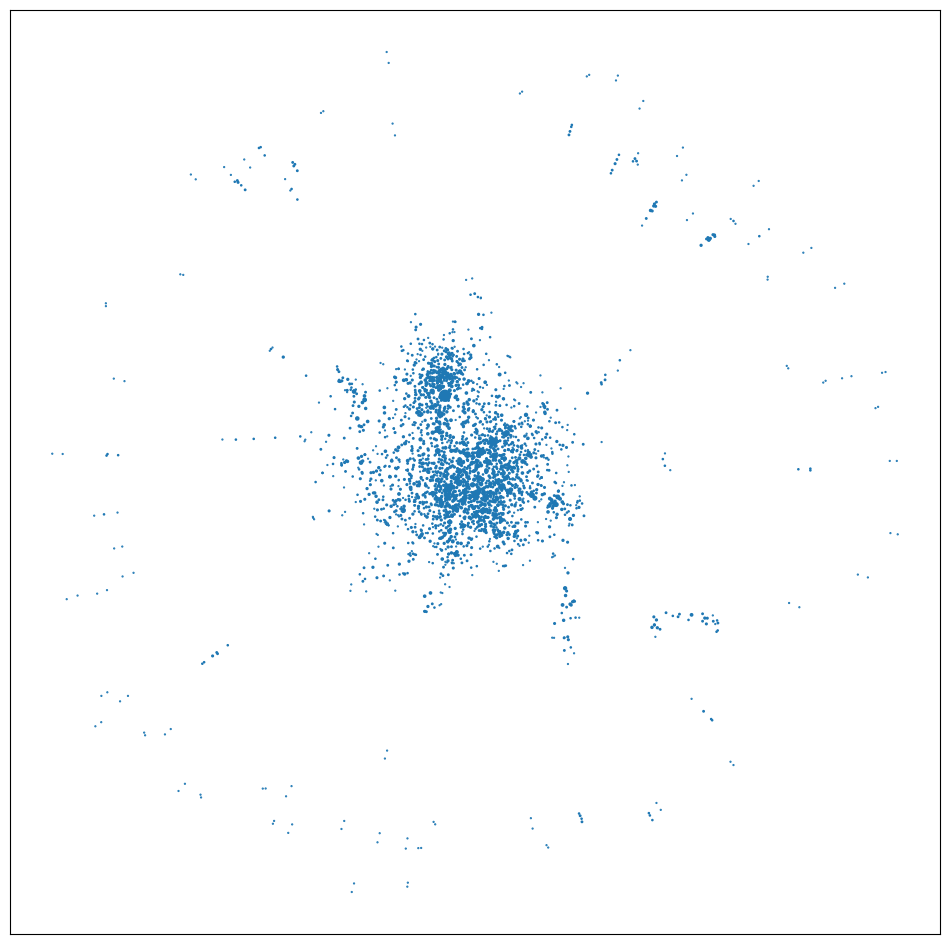

In [6]:
# Poniższa komórka zawiera importowanie bibliotek obliczeniowych numpy, rysunkowych matplotlib i biblioteki networx do tworzenia obrazów grafów i wykonywania operacji na grafach.
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Konwersja danych z klasy Planetoid do klasy Graph biblioteki networx.
G = to_networkx(data)
#Obliczenie wielkości węzła na podstawie jego stopnia degv.
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
pos = nx.spring_layout(G, seed=42)
#Wyrysowanie grafu z odpowiednimi wielkościami węzłów.
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_size)
plt.show()

##1.2 Podstawowe wartości węzłów
Poniższe komórki zawierają przedstawienie węzłów zbioru i ich liczności z uwzględnieniem kategorii pracy. Ponadto komórki poniżej zawierają informacje na temat 10 węzłów z największym stopniem degv i ich umiejscowienie na grafie.

In [7]:
#Utworzenie obiektu typu słownik z 7 klasami prac dla tego zbioru.
labels = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}

In [8]:
#Reprezentacja węzłów jako obiektu ndarray z połączeniami do innych węzłów i numerycznym przedsrawieniem klasy. Obiekt data_np_x zawiera informacje o połączeniach do danego węzła gdzie indeks szeregu to numer węzła. Obiekt data_np_y zawiera informacje o kategorii węzła (kategorii publikacji)
#gdzie indeks szeregu to numer węzła.
data_np_x = data.x.numpy()
data_np_y = data.y.numpy()
print(data_np_x, data_np_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3 4 4 ... 3 3 3]


{'Theory': 351, 'Reinforcement_Learning': 217, 'Genetic_Algorithms': 418, 'Neural_Networks': 818, 'Probabilistic_Methods': 426, 'Case_Based': 298, 'Rule_Learning': 180}


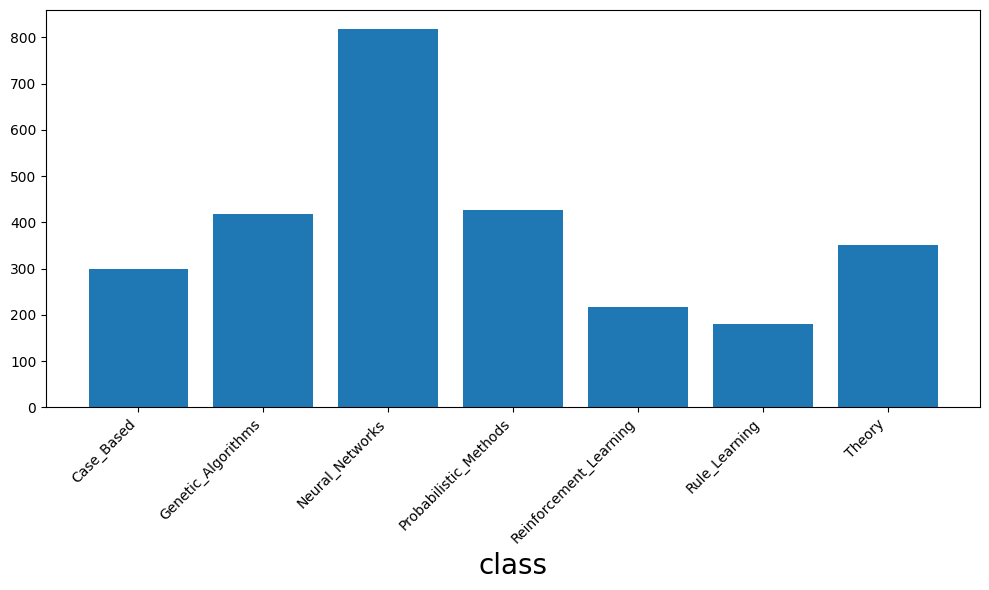

In [9]:
#Korzystając z metody unique biblioteki numpy możemy wyliczyć ile było unikalnych wystąpień - w tym wypadku naszych klas.
unique, counts = np.unique(data_np_y, return_counts=True)
counter = {}

#Za pomocą pętli możemy korzystając z słownika labels wpisać do kolejnego słownika liczbę wystąpienia danej klasy w grafie.
for key, value in zip(unique, counts):
  counter[labels[key]] = value

print(counter)
names = []

for name in sorted(counter.keys()):
  names.append(name)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count, tick_label=names)
plt.xlabel("class", size=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

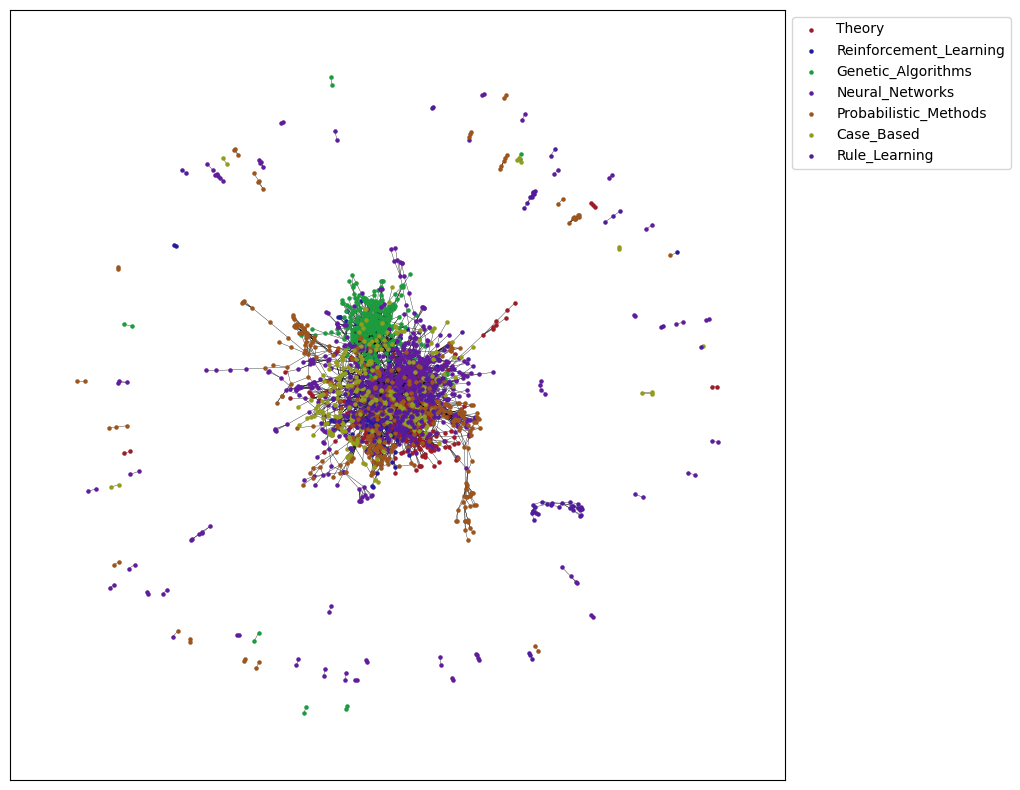

In [10]:
#Poniższa komórka zwiera prezentację graficzną grafu, w którym podzielone są węzły na kategorie publikacji do których przynależą. Obiekt node_list reprezentuje listę list, którego indeks głównej listy opisuje, jaki to rodzaj publikacji.
G = to_networkx(data, to_undirected=True)

node_list = [[], [], [], [], [], [], []]
color_list = ['#9c1c27', '#251c9c', '#1c9c3e', '#601c9c', '#9c551c', '#939c1c', '#511c9c']
#Iteracja po enumeracji obiektu data.y zwraca nam n-numer węzła i oraz i-kategorię węzła.
for n, i in enumerate(data.y):
    node_list[i].append(n)

pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
label_list = list(labels.values())
#Osobna i jednoczesna iteracja po liście node_list oraz label_list umożliwia na grafie rysowanie węzłów tylko z danego rodzaju publikacji.
for num, i in enumerate(zip(node_list, label_list)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = color_list[num], label=l)

nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [11]:
#Za pomocą biblioteki heapq możemy szybko wyznaczyć 10 węzłów z największym stopniem degv.
import heapq
degree_centrality = nx.degree_centrality(G)

largest_degrees = heapq.nlargest(10, degree_centrality, key=degree_centrality.get)
print(largest_degrees)

[1358, 306, 1701, 1986, 1810, 1623, 2034, 88, 1013, 598]


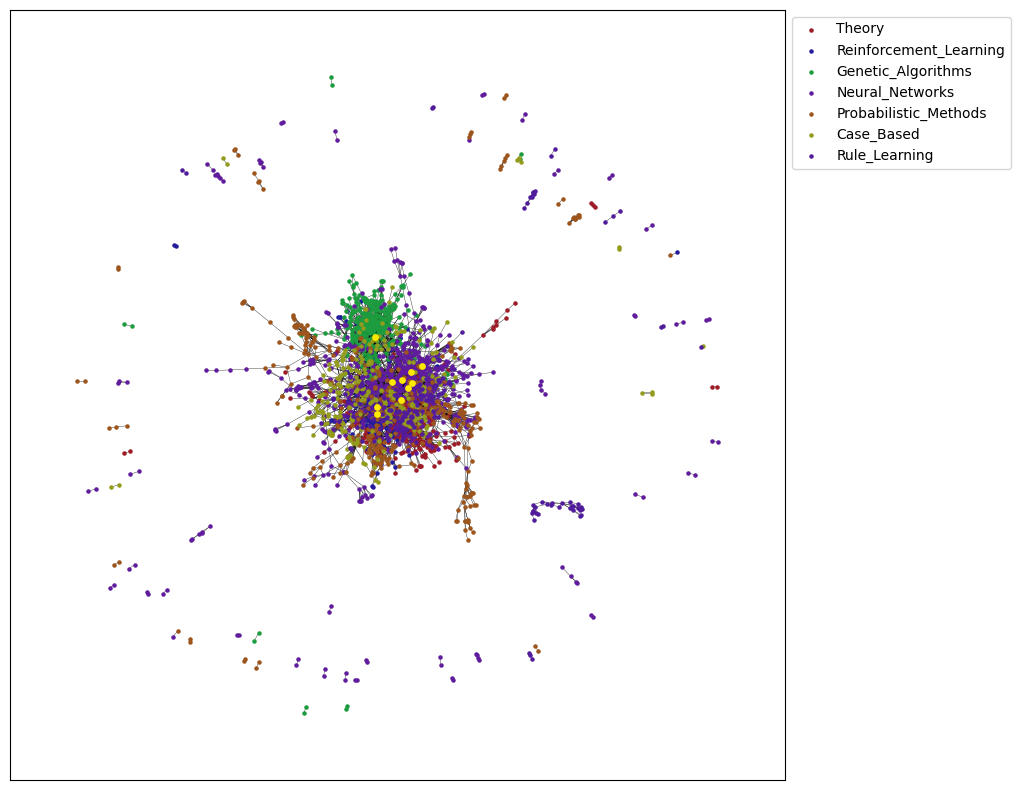

In [12]:
#Poniższa komórka rysuje kolejny graf z podziałem na kategorie jednak kolorem żółtym wskazuje które publikacje w grafie posiadają największy stopień.
plt.figure(figsize = (10, 10))

for num, i in enumerate(zip(node_list, label_list)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = color_list[num], label=l)

nx.draw_networkx_nodes(G, pos, nodelist=largest_degrees, node_size = 15, node_color = '#ffea00')

nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [13]:
#Poniższa komórka zawiera obiekt labels_dict, który posiada informacje na temat jakiego rodzaju jest każdy węzeł w formie słownika.
labels_dict = {}

iter = 0

for category in node_list:
  for node in category:
    labels_dict[node]= iter
  iter+=1

print(labels_dict)

{3: 0, 6: 0, 10: 0, 11: 0, 32: 0, 35: 0, 52: 0, 60: 0, 61: 0, 62: 0, 65: 0, 74: 0, 79: 0, 80: 0, 81: 0, 88: 0, 94: 0, 95: 0, 98: 0, 100: 0, 142: 0, 146: 0, 149: 0, 161: 0, 164: 0, 186: 0, 195: 0, 204: 0, 211: 0, 214: 0, 239: 0, 242: 0, 257: 0, 260: 0, 270: 0, 274: 0, 276: 0, 279: 0, 280: 0, 292: 0, 304: 0, 305: 0, 315: 0, 323: 0, 324: 0, 334: 0, 347: 0, 354: 0, 365: 0, 373: 0, 405: 0, 408: 0, 415: 0, 423: 0, 434: 0, 437: 0, 440: 0, 446: 0, 456: 0, 461: 0, 467: 0, 475: 0, 478: 0, 485: 0, 496: 0, 497: 0, 502: 0, 525: 0, 527: 0, 530: 0, 531: 0, 543: 0, 544: 0, 572: 0, 586: 0, 591: 0, 606: 0, 614: 0, 619: 0, 624: 0, 636: 0, 642: 0, 651: 0, 659: 0, 666: 0, 667: 0, 679: 0, 680: 0, 693: 0, 707: 0, 711: 0, 717: 0, 718: 0, 725: 0, 730: 0, 731: 0, 733: 0, 734: 0, 736: 0, 738: 0, 751: 0, 753: 0, 763: 0, 767: 0, 769: 0, 771: 0, 777: 0, 794: 0, 809: 0, 815: 0, 838: 0, 839: 0, 842: 0, 851: 0, 852: 0, 858: 0, 861: 0, 863: 0, 873: 0, 880: 0, 888: 0, 895: 0, 897: 0, 901: 0, 917: 0, 948: 0, 964: 0, 965:

In [14]:
#Poniższa komórka chce znaleźc jakiej kategorii jest 10 węzłów z największym stopniem.
largest_degrees_labels = {}

iter = 0
for category in node_list:
  for node in category:
    if node in largest_degrees:
      largest_degrees_labels[node]= labels[iter]
  iter+=1

print(largest_degrees_labels)

{88: 'Theory', 1013: 'Theory', 306: 'Reinforcement_Learning', 1623: 'Reinforcement_Learning', 1358: 'Genetic_Algorithms', 598: 'Neural_Networks', 1701: 'Neural_Networks', 1810: 'Neural_Networks', 1986: 'Neural_Networks', 2034: 'Probabilistic_Methods'}


## 1.3 Szczególne właściwości grafu
Poniższe komórki zawierają analizę społeczności (comonuity detection) oraz homofilię węzłów na podstawie kategorii. Homofilia węzłów określa nam jak często węzły są połączone ze sobą wtedy gdy ich kategoria jest taka sama.

In [15]:
#Poniższa komórka określa nam ile jest społeczności w grafie na podstawie algorytmu Clauset-Newman-Moore.
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(G))
print(len(communities))

106


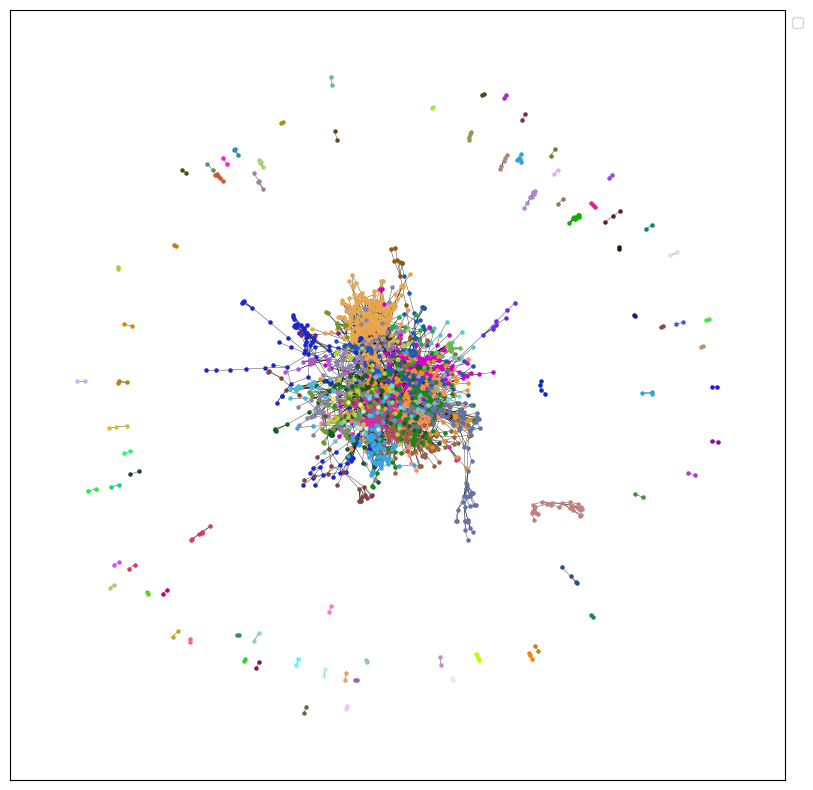

In [16]:
#Poniższa komórka generuje obraz grafu z podziałem na wskazane 106 społeczności, każda społeczność ma swój unikalny kolor na grafie.
import random

plt.figure(figsize = (10, 10))

def verify_two_digit_hex(code: str) -> str:
  new_code = ''
  if len(code) < 4:
    new_code = '0'+code[2:]
  else:
    new_code = code[2:]
  return new_code

for community in list(communities):
    r = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    g = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    b = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    community_list = list(community)
    std_color = "#" + r+g+b
    nx.draw_networkx_nodes(G, pos, nodelist=community_list, node_size = 5, node_color = std_color)


nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [17]:
number_of_edges = G.number_of_edges()
print(number_of_edges)

5278


In [18]:
data_edge_np = data.edge_index.numpy()
print(data_edge_np)

[[ 633 1862 2582 ...  598 1473 2706]
 [   0    0    0 ... 2707 2707 2707]]


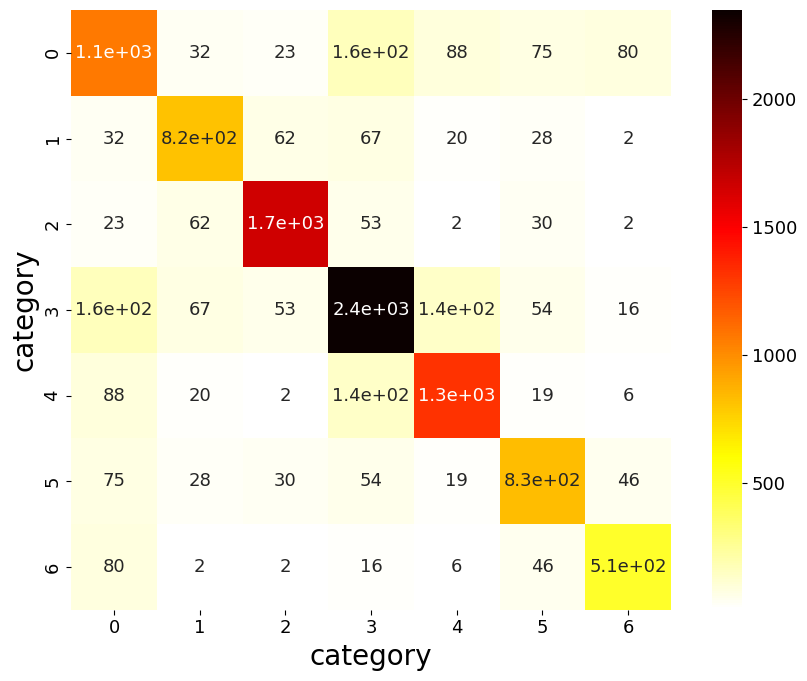

In [19]:
#Poniższa komórka zawiera obliczenia ilości połączeń zależnie od kategorii publikacji. Format COO, który jest standardem dla biblioteki networx to standard tworzący obiekt połączeń, w których występują dwie tablice, pierwsza zawiera węzeł z którego wychodzi połączenie i na
#tym samym indeksu w drugiej tablicy do którego wychodzi to połączenie. Konwersja węzłów na kategorie i zliczenie połączeń (7x7=49 możliwych) umożliwi nam określenie homofilii zbioru.
import seaborn as sns
#COO Format
connection_matrix = [
    [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0]
    ]

iter = 0
connected_labels_set = list(map(lambda x: data_np_y[x], data.edge_index.numpy()))
connected_labels_set = np.array(connected_labels_set)

for i in range(len(connected_labels_set[0])):
  node_label_A = connected_labels_set[0][i]
  node_label_B = connected_labels_set[1][i]
  connection_matrix[node_label_A][node_label_B]+=1

plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(connection_matrix, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("category",size=20)
plt.ylabel("category",size=20)
plt.tight_layout()
plt.show()

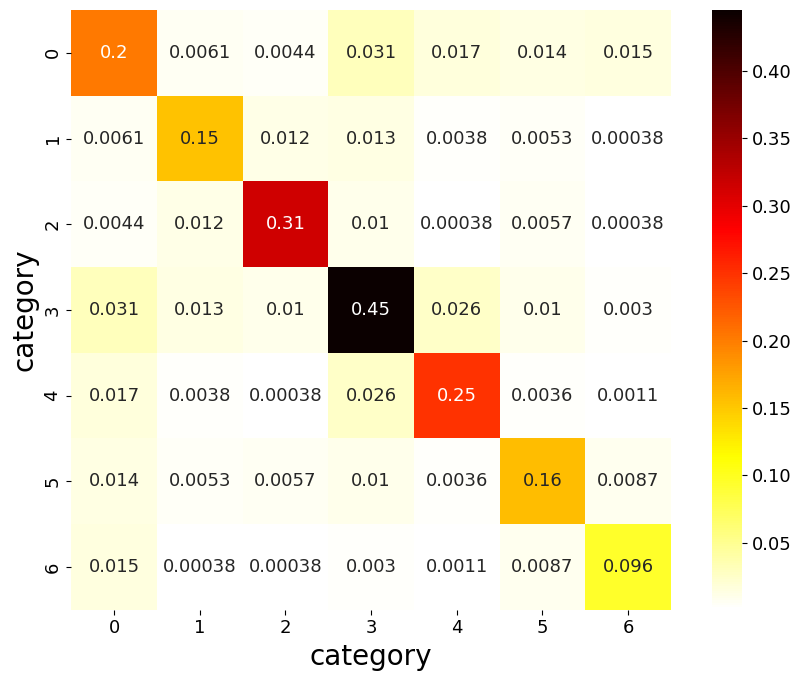

In [20]:
#Po podzieleniu poprzedniej macierzy connection_matrix przez liczbę wszystkich połączeń pozwoli nam określić jaki współczynnik homofilii ma każde połączenie.
homophilly_array = np.array(connection_matrix)/number_of_edges

plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(homophilly_array, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("category",size=20)
plt.ylabel("category",size=20)
plt.tight_layout()
plt.show()

#2. Utworzenie sieci neuronowej i predykcja kategorii węzła.
Poniższe komórki zawierają prostą implementację sieci neuronowej z wykorzystaniem biblioteki Stellar Graph do predykcji kategorii węzła na podstawie połączeń węzła.

In [ ]:
!pip install tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 638.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 33.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  A

In [22]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-cqocy1sa
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-cqocy1sa
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=1f0ec3c9d3ccd67890b371396ad4f4664447ed9a7a918db4b3185515973a1692
  Stored in directory: /tmp/pip-ephem-wheel-cache-vniu4dp8/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [24]:
#Poniższa komórka zawiera import niezbędnych bibliotek do pudowania sieci neuronowej dla naszego datasetu.
import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Poniższa komórka pobiera zbiór danych CORA podobnie w formacie wykorzystywanym przez bibliotekę Stellar Graph.
dataset = sg.datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

In [26]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


In [27]:
node_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,818
Probabilistic_Methods,426
Genetic_Algorithms,418
Theory,351
Case_Based,298
Reinforcement_Learning,217
Rule_Learning,180


In [29]:
#Poniższa komórka dzieli zbiór danych na sto elementowy zbiór treningowy oraz pięćsetelementowy zbiór walidacyjny.
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=100, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=500, test_size=None, stratify=test_subjects
)

In [30]:
train_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,30
Probabilistic_Methods,16
Genetic_Algorithms,15
Theory,13
Case_Based,11
Reinforcement_Learning,8
Rule_Learning,7


In [31]:
val_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,151
Probabilistic_Methods,79
Genetic_Algorithms,77
Theory,65
Case_Based,55
Reinforcement_Learning,40
Rule_Learning,33


In [32]:
#Żeby móc utworzyć sieć neuronową potrzebujemy wykonać encoding parametrów, które nie są reprezentowane za pomoca liczb i do tego wykorzystamy klasę LabelBinarizer z biblioteki sklearn. Jest to klasa, która najpierw wykorzystuje One Hot encoding a następnie za pomocą ilości występowania
#danego parametru wykonuje encodingu za pomocą liczby.
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
train_targets = enc.fit_transform(train_subjects)
val_targets = enc.transform(val_subjects)
test_targets = enc.transform(test_subjects)

In [33]:
#Klasa generatora ze wskazaniem obiektu G jako obiektu grafu CORA.
generator = FullBatchNodeGenerator(G, method="gcn")

Using GCN (local pooling) filters...


In [34]:
#Komórka utowrzenia generatora dla danych treningowych oraz utorzenie warstw sieci GCN i wskazaniem ReLu jako funkcji aktywacji.
train_gen = generator.flow(train_subjects.index, train_targets)
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)
x_inp, x_out = gcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

In [35]:
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)
val_gen = generator.flow(val_subjects.index, val_targets)

In [36]:
#Określenie monitorowania parametru val_acc w funkcji early stopping.
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

In [38]:
#Metoda pasoania modelu dla 250 epok.
history = model.fit(
    train_gen,
    epochs=250,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,
    callbacks=[es_callback],
)


Epoch 1/250
1/1 - 0s - loss: 1.8122 - acc: 0.4700 - val_loss: 1.8437 - val_acc: 0.4120 - 260ms/epoch - 260ms/step
Epoch 2/250
1/1 - 0s - loss: 1.8074 - acc: 0.3800 - val_loss: 1.8360 - val_acc: 0.4160 - 315ms/epoch - 315ms/step
Epoch 3/250
1/1 - 0s - loss: 1.7894 - acc: 0.4700 - val_loss: 1.8279 - val_acc: 0.4200 - 247ms/epoch - 247ms/step
Epoch 4/250
1/1 - 0s - loss: 1.7892 - acc: 0.4700 - val_loss: 1.8195 - val_acc: 0.4280 - 316ms/epoch - 316ms/step
Epoch 5/250
1/1 - 0s - loss: 1.7625 - acc: 0.4500 - val_loss: 1.8108 - val_acc: 0.4280 - 336ms/epoch - 336ms/step
Epoch 6/250
1/1 - 0s - loss: 1.7471 - acc: 0.4900 - val_loss: 1.8019 - val_acc: 0.4280 - 224ms/epoch - 224ms/step
Epoch 7/250
1/1 - 0s - loss: 1.7414 - acc: 0.5100 - val_loss: 1.7928 - val_acc: 0.4360 - 247ms/epoch - 247ms/step
Epoch 8/250
1/1 - 0s - loss: 1.7264 - acc: 0.5100 - val_loss: 1.7833 - val_acc: 0.4360 - 226ms/epoch - 226ms/step
Epoch 9/250
1/1 - 0s - loss: 1.7237 - acc: 0.5100 - val_loss: 1.7736 - val_acc: 0.4340 -

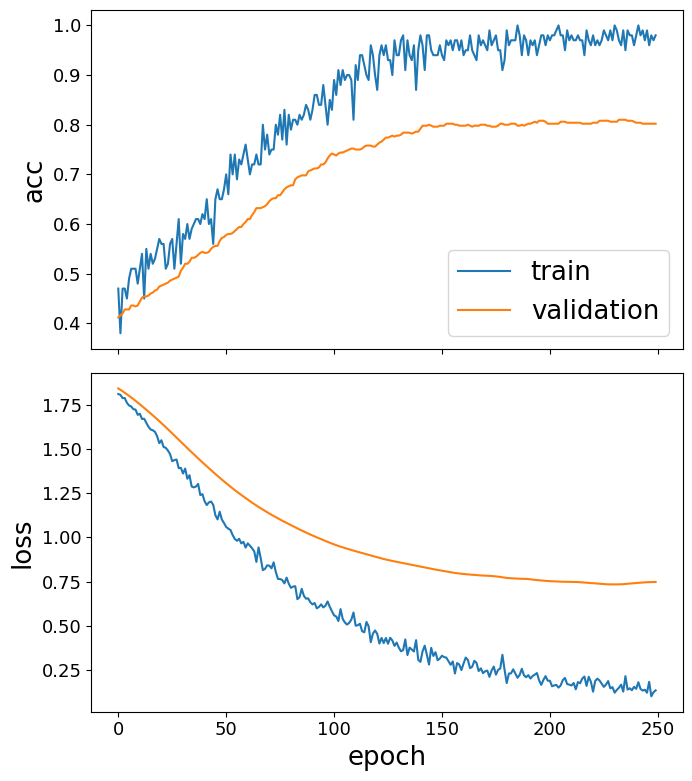

In [39]:
sg.utils.plot_history(history)

In [40]:
test_gen = generator.flow(test_subjects.index, test_targets)

In [41]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 77ms/step - loss: 0.7480 - acc: 0.7756

Test Set Metrics:
	loss: 0.7480
	acc: 0.7756


In [42]:
#Metody predykcji dla pozostałego zbioru.
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

1/1 [==============================] - 0s 313ms/step


In [43]:
node_predictions = enc.inverse_transform(all_predictions.squeeze())

In [44]:
import pandas as pd
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
31336,Neural_Networks,Neural_Networks
1061127,Rule_Learning,Rule_Learning
1106406,Reinforcement_Learning,Reinforcement_Learning
13195,Reinforcement_Learning,Reinforcement_Learning
37879,Probabilistic_Methods,Probabilistic_Methods
1126012,Probabilistic_Methods,Probabilistic_Methods
1107140,Reinforcement_Learning,Theory
1102850,Neural_Networks,Neural_Networks
31349,Neural_Networks,Neural_Networks
1106418,Theory,Theory


##3. Podsumowanie.
Poniższy zeszyt zawiera sprawozdanie z analizy zbioru danych CORA oraz prostą sieć neuronową GCN. Z przeprowadzonych analiz możemy wywnioskować, że w ten zbiór danych zawiera węzły o wysokoiej homofilii dla parametru kategorii. Oznacza to, że prace najczęściej cytowały prace z tej samej kategorii. Ponadto w zbiorze danych przeważały prace z kategorii Neural Networks i to ta kategoria zawierała, bo aż 4, outlierów, węzłów z największym stopniem degv. Zbiór danych według algorytmu Clauset-Newman-Moore zawiera 106 społeczności. Utworzona sieć neuronowa posiada poprawność predykcji na poziomie 80%